In [1]:
#Library importing
library(ggplot2)
library(tidyverse)

# [CpGI_filtered, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/da/050a0edbcbf03aa7fba7520c932c28/chr15_merged_sorted.CpGI_filtered.per-base.bed, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/da/050a0edbcbf03aa7fba7520c932c28/chr15_merged_sorted.CpGI_filtered.quantized.bed, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/da/050a0edbcbf03aa7fba7520c932c28/chr15_merged_sorted.CpGI_filtered.regions.bed, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/da/050a0edbcbf03aa7fba7520c932c28/chr15_merged_sorted.CpGI_filtered.thresholds.bed, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/da/050a0edbcbf03aa7fba7520c932c28/chr15_merged_sorted.CpGI_filtered.mosdepth.summary.txt, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/da/050a0edbcbf03aa7fba7520c932c28/chr15_merged_sorted.CpGI_filtered.mosdepth.region.dist.txt, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/da/050a0edbcbf03aa7fba7520c932c28/chr15_merged_sorted.CpGI_filtered.mosdepth.global.dist.txt]
# [mane_cds, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/7c/6643883f1110fd157785fffc9a1700/chr7_merged_sorted.mane_cds.per-base.bed, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/7c/6643883f1110fd157785fffc9a1700/chr7_merged_sorted.mane_cds.quantized.bed, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/7c/6643883f1110fd157785fffc9a1700/chr7_merged_sorted.mane_cds.regions.bed, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/7c/6643883f1110fd157785fffc9a1700/chr7_merged_sorted.mane_cds.thresholds.bed, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/7c/6643883f1110fd157785fffc9a1700/chr7_merged_sorted.mane_cds.mosdepth.summary.txt, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/7c/6643883f1110fd157785fffc9a1700/chr7_merged_sorted.mane_cds.mosdepth.region.dist.txt, /mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/work/7c/6643883f1110fd157785fffc9a1700/chr7_merged_sorted.mane_cds.mosdepth.global.dist.txt]

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
round = 3
# List all files that match the pattern and save their paths in a list
# List all files that match the pattern and save their paths in a list
coverage_path = list.files(
  path = "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/NANOPORE_DATA/Basecalling_result/basecalling_result_Nanopore08/4.Mosdepth/samtools", 
  pattern = "SQK-NBD114-24_barcode1[6-8]\\.coverage\\.tsv$", 
  full.names = TRUE
)

depth_path = list.files(
  path = "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/NANOPORE_DATA/Basecalling_result/basecalling_result_Nanopore08/4.Mosdepth/samtools",
  pattern = "SQK-NBD114-24_barcode1[6-8]\\.depth.sum.tsv$",
  full.names = TRUE
)

# cg_island_region_path = list.files(path = "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/nf-core-buildreference/results3/5.Bam_depth/",
#                             pattern = "*.CpGI_filtered.regions.bed",
#                             full.names = TRUE)

# exon_region_path = list.files(path = "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/nf-core-buildreference/results3/5.Bam_depth/",
#                             pattern = "*.mane_exon.regions.bed",
#                             full.names = TRUE)

# cg_motif_region_path = list.files(path = "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/nf-core-buildreference/results3/5.Bam_depth/",
#                             pattern = "*.cg_motifs_filtered.regions.bed",
#                             full.names = TRUE)

# cds_region_path = list.files(path = "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/nf-core-buildreference/results3/5.Bam_depth/",
#                             pattern = "*.mane_cds.regions.bed",
#                             full.names = TRUE)

# gene_region_path = list.files(path = "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/nf-core-buildreference/results3/5.Bam_depth/",
#                             pattern = "*.mane_gene.regions.bed",
#                             full.names = TRUE)

## Plot the Coverage and MeanDepth

In [6]:
print(coverage_path)
print(depth_path)

[1] "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/NANOPORE_DATA/Basecalling_result/basecalling_result_Nanopore08/4.Mosdepth/samtools/SQK-NBD114-24_barcode16.coverage.tsv"
[2] "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/NANOPORE_DATA/Basecalling_result/basecalling_result_Nanopore08/4.Mosdepth/samtools/SQK-NBD114-24_barcode17.coverage.tsv"
[3] "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/NANOPORE_DATA/Basecalling_result/basecalling_result_Nanopore08/4.Mosdepth/samtools/SQK-NBD114-24_barcode18.coverage.tsv"
[1] "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/NANOPORE_DATA/Basecalling_result/basecalling_result_Nanopore08/4.Mosdepth/samtools/SQK-NBD114-24_barcode16.depth.sum.tsv"
[2] "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/NANOPORE_DATA/Basecalling_result/basecalling_result_Nanopore08/4.Mosdepth/samtools/SQK-NBD114-24_barcode17.depth.sum.tsv"
[3] "/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/NANOPORE_DATA/Basecalling_result/basecalling_result_Nanopore08/

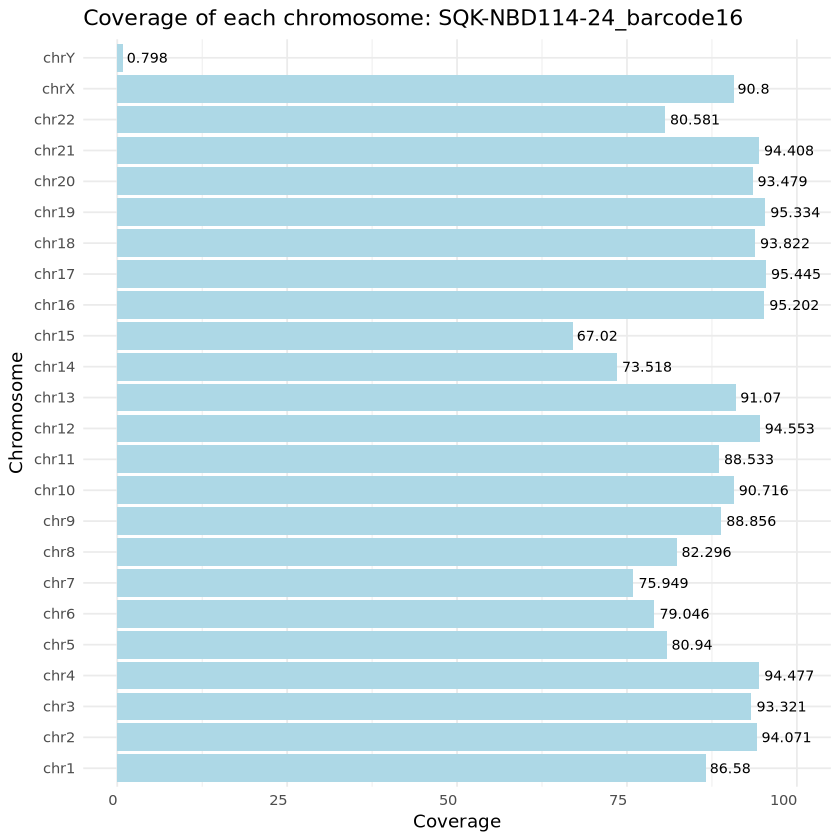

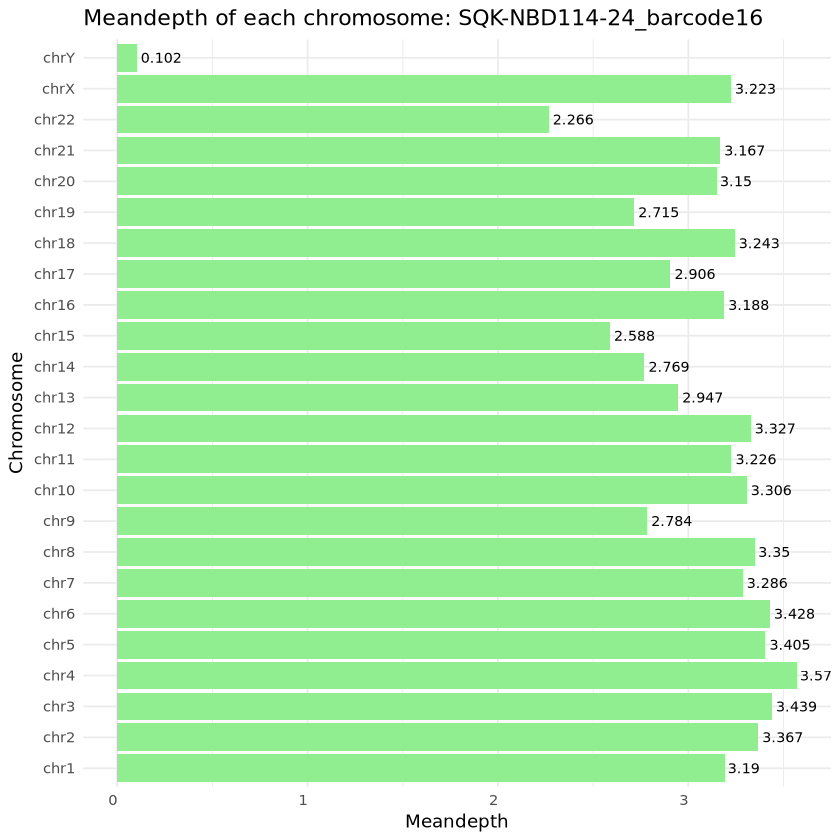

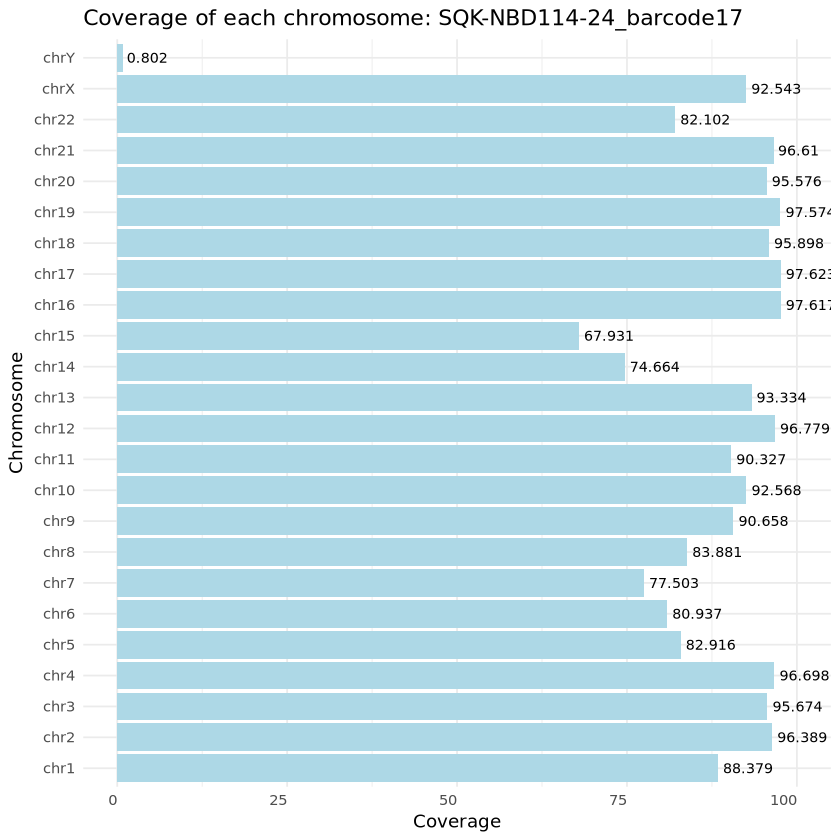

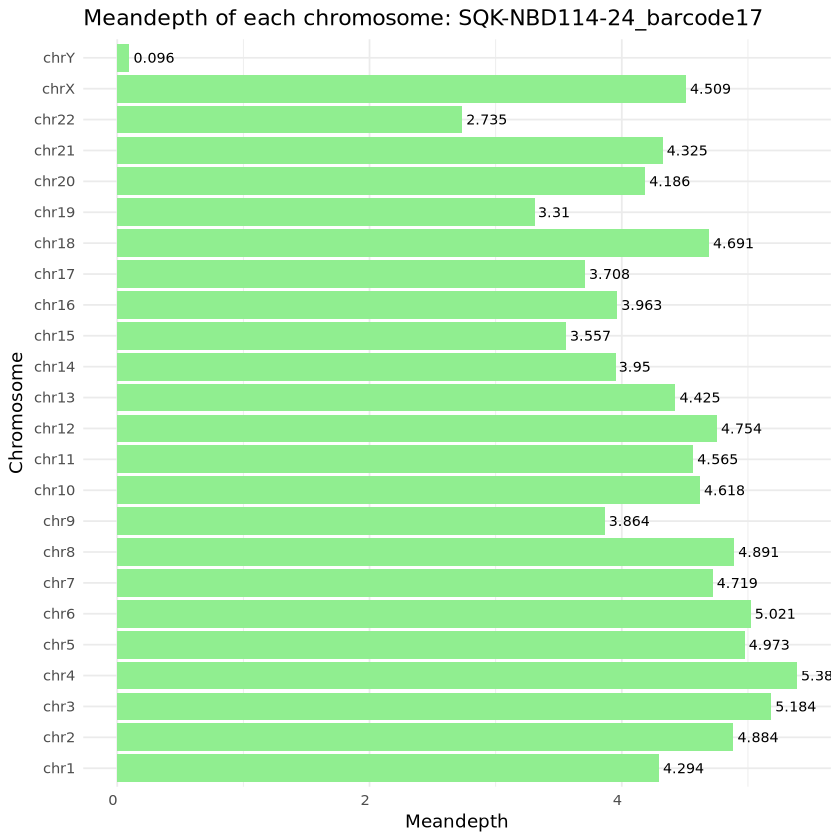

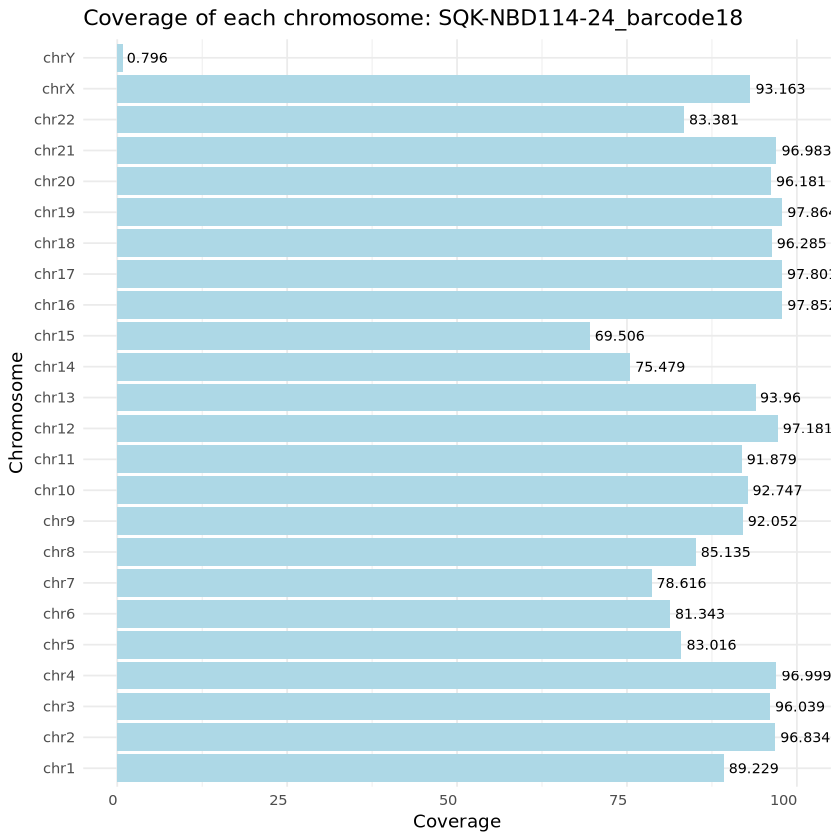

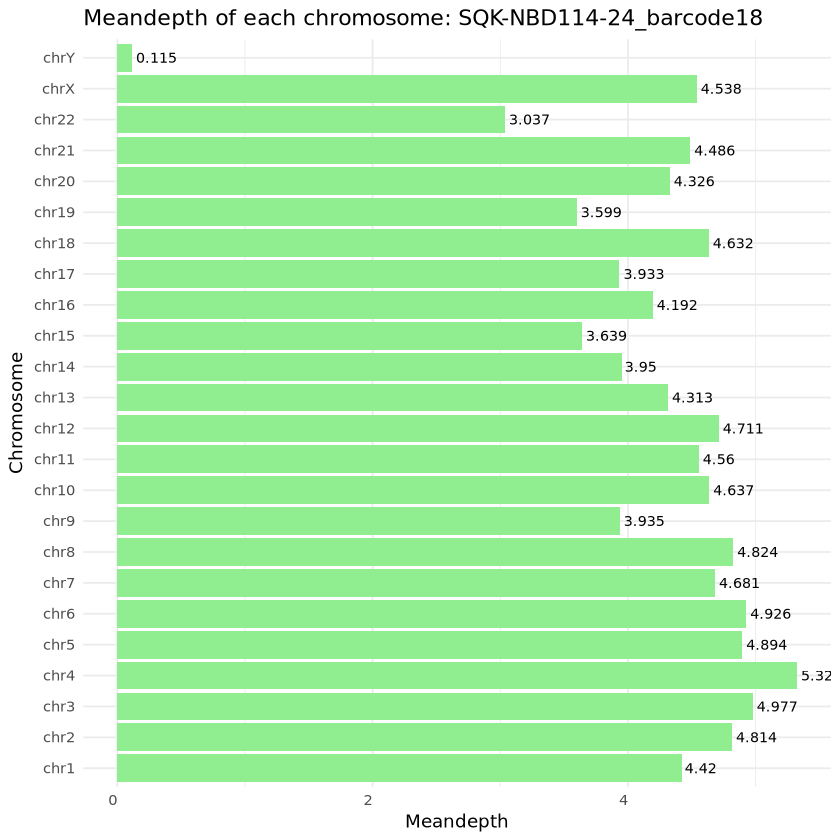

In [13]:
#Create function to plot the horizontal bar chart of coverage
plot_horizontal_bar_chart <- function(data_path) {
  #Get the samplename: basename, then remove the ".coverage.tsv"
  samplename = gsub(".coverage.tsv", "", basename(data_path))

  data = read.table(data_path, header = FALSE, sep = "\t", check.names = FALSE)

  #Naming the header: chr, startpos,endpos, numreads, covbases, coverage, meandepth, meanbaseq, meanmapq
  colnames(data) = c("chr", "startpos", "endpos", "numreads", "covbases", "coverage", "meandepth", "meanbaseq", "meanmapq")

  # Create a custom order for sorting
  chromosome_order <- c(paste0("chr", 1:22), "chrX", "chrY")

  # Sort the data frame by rname using the custom order
  data <- data[order(match(data$chr, chromosome_order)), ]

    # Plot horizontal barplot to show the coverage of each chromosome
  cov_plot =   ggplot(data, aes(x = coverage, y = chr)) +
                      geom_bar(stat = "identity", fill = "lightblue") +
                      theme_minimal() +
                      theme(axis.text.x = element_text(angle = 0, hjust = 1)) +
                      labs(title = paste0("Coverage of each chromosome: ",samplename), x = "Coverage", y = "Chromosome") +
                      #Add coverage value on the bar
                      geom_text(aes(label = round(coverage, round)), hjust = -0.1, size = 3) +
                      #Scale the x-axis to 100
                      scale_x_continuous(limits = c(0, 100)) +
                      #Add chromosome name to the y-axis
                      scale_y_discrete(labels = chromosome_order)
  
  print(cov_plot)

  #Fix the order of the chromosome
  data$chr = factor(data$chr, levels = chromosome_order)

    # Plot horizontal barplot to show the meandepth of each chromosome
  depth_plot = ggplot(data, aes(x=meandepth,y=chr)) +
                    geom_bar(stat = "identity", fill = "lightgreen") +
                    theme_minimal() +
                    theme(axis.text.x = element_text(angle = 0, hjust = 1)) +
                    labs(title = paste0("Meandepth of each chromosome: ",samplename), x = "Meandepth", y = "Chromosome") +
                    geom_text(aes(label = round(meandepth, round)), hjust = -0.1, size = 3)
  
  print(depth_plot)          
}

for (coverage in coverage_path) {
    plot_horizontal_bar_chart(coverage)
}
#plot_horizontal_bar_chart("/mnt/NAS_PROJECT/vol_Phucteam/CONGNGUYEN/pipeline/NANOPORE_DATA/Basecalling_result/basecalling_result_Nanopore06/4.Mosdepth/samtools/SQK-NBD114-24_barcode01.coverage.tsv")

## Depth of whole genome

[1] "SQK-NBD114-24_barcode16"
[1] "SQK-NBD114-24_barcode17"


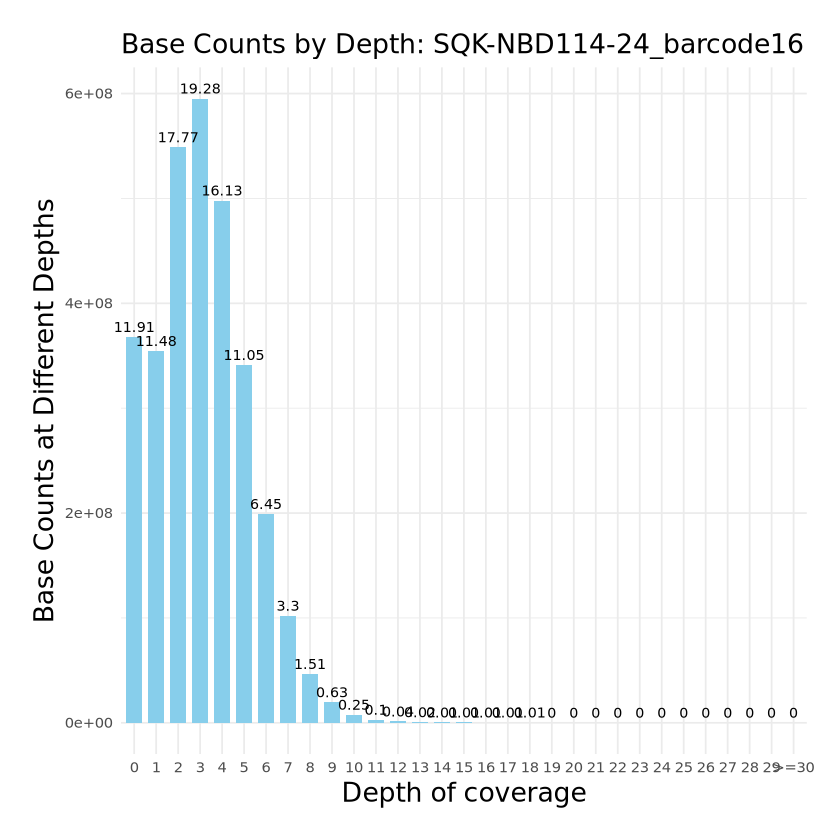

[1] "SQK-NBD114-24_barcode18"


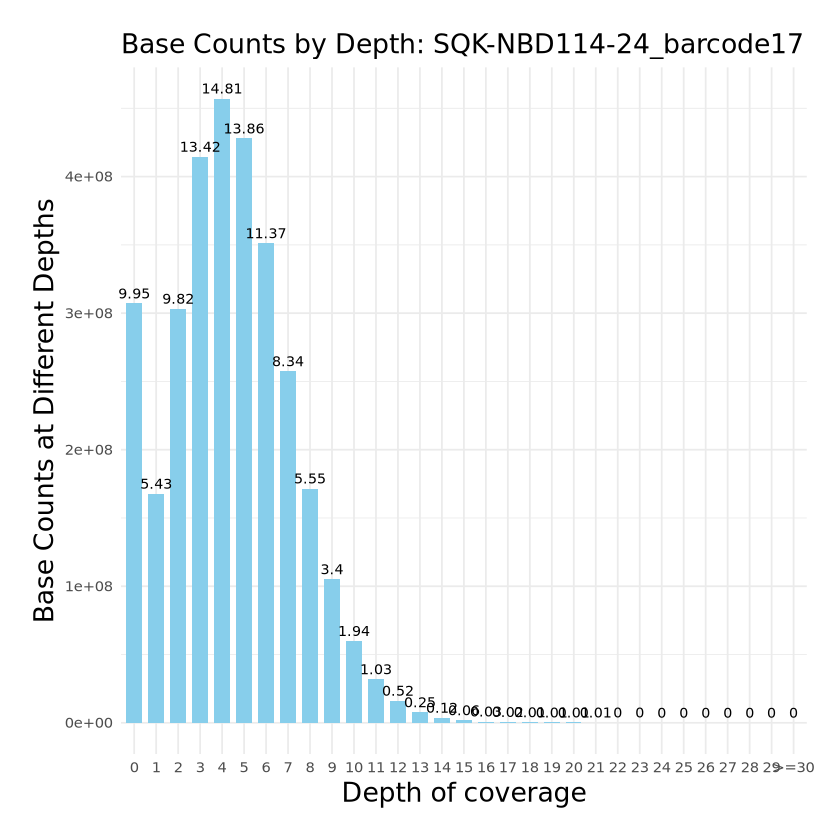

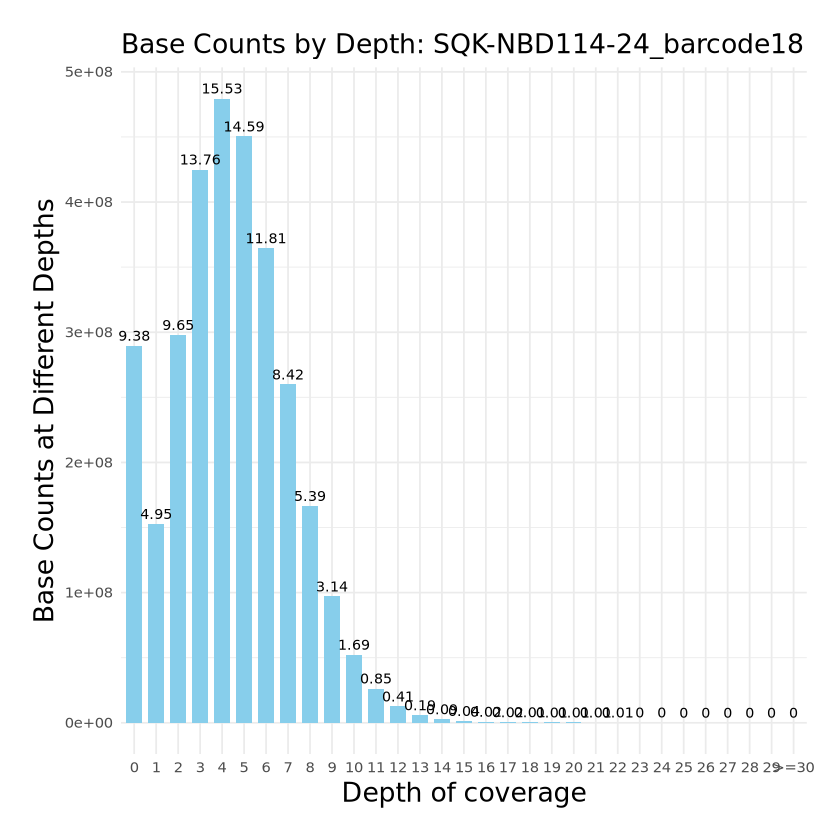

In [11]:
plot_horizontal_depth_bar_chart <- function(data_path,threshold) {

    # Get the chr name: get basename, then remove ".depth.sum.tsv"
    samplename <- gsub(".depth.sum.tsv", "", basename(data_path))
    print(samplename)

    # Read the data_path
    data <- read.csv(data_path, header = FALSE, sep = "\t", check.names = FALSE)

    #name the header: Depth, Occurrence
    colnames(data) <- c("Depth", "Occurrence")

    #Sort depth in ascending order
    data <- data[order(data$Depth), ]

    #Create a new df by only taking the record with values in Cov < threshold
    data <- data[data$Depth < threshold, ]

    #Occurence >=threshold: Sum the value in the Occurrence column if the value in the column Cov is greater than or equal to threshold
    sum_occurence_ge_threshold <- sum(data$Occurrence[data$Depth >= threshold])

    #Create a new record with Cov >=threshold, Occurence = sum_occurence_ge_threshold, then add this record to the data_depth_total_filtered
    new_record <- data.frame(Depth = paste0(">=",threshold), Occurrence = sum_occurence_ge_threshold)
    data <- rbind(data,new_record)

    #Set rowname is the Depth
    rownames(data) <- data$Depth

    #Create a new column to store the percentage of each depth
    data$Percentage <- (data$Occurrence / sum(data$Occurrence)) * 100

    #Round the percentage to 4 decimal places
    data$Percentage <- round(data$Percentage, 2)

    data$Depth <- factor(data$Depth, levels = unique(data$Depth))

    # Create the barplot
    plot = ggplot(data, aes(x = Depth)) +
                geom_bar(aes(y = Occurrence), stat = "identity", fill = "skyblue", width = 0.7) +
                geom_text(aes(y = Occurrence, label = Percentage), vjust = -0.5, size = 3) +
                labs(x = "Depth of coverage", y = "Base Counts at Different Depths", title = paste0("Base Counts by Depth: ",samplename)) +
                theme_minimal() +
                theme(plot.title = element_text(size = 16), axis.title = element_text(size = 16)) +
                coord_cartesian(clip = "off") +
                theme(plot.margin = margin(20, 20, 20, 20, "pt"))
    
    print(plot)

}

for (depth in depth_path) {
    plot_horizontal_depth_bar_chart(depth,30)
}


In [ ]:
## Histogram of depth function
hist_depth <- function(data, title) {
    ggplot(data, aes(x = V4)) +
        geom_histogram(binwidth = 1, fill = "lightblue") +
        theme_minimal() +
        labs(title = title, x = "Depth", y = "Frequency") +
        #Add background grid and white color
        theme(panel.grid.major = element_line(colour = "white", size = 0.5),
              panel.grid.minor = element_line(colour = "white", size = 0.25))
    
    #Save the plot as a png file
    ggsave(paste0(title, ".png"), width = 10, height = 6)
}

In [ ]:
# ###CPG Island###
# #Merge all the data in cg_island_region_path
# cg_island_region_depth_total = data.frame()

# for (file in cg_island_region_path) {
#     #Read the file
#     data <- read.csv(file, header = FALSE, sep = "\t", check.names = FALSE)

#     #merge the data
#     cg_island_region_depth_total <- rbind(cg_island_region_depth_total, data)
# }
# #Render the histogram of depth: CG Island
# hist_depth(cg_island_region_depth_total, "Histogram_of_depth_CG_Island")

# ########################################################################################
# ###Exon###
# #Merge all the data in exon_region_path
# exon_region_depth_total = data.frame()

# for (file in exon_region_path) {
#     #Read the file
#     data <- read.csv(file, header = FALSE, sep = "\t", check.names = FALSE)

#     #merge the data
#     exon_region_depth_total <- rbind(exon_region_depth_total, data)
# }

# #Render the histogram of depth: Exon
# hist_depth(exon_region_depth_total, "Histogram_of_depth_Exon")

# ########################################################################################
# ###CG Motif###
# #Merge all the data in cg_motif_region_path
# cg_motif_region_depth_total = data.frame()

# for (file in cg_motif_region_path) {
#     #Read the file
#     data <- read.csv(file, header = FALSE, sep = "\t", check.names = FALSE)

#     #merge the data
#     cg_motif_region_depth_total <- rbind(cg_motif_region_depth_total, data)
# }

# #Render the histogram of depth: CG Motif
# hist_depth(cg_motif_region_depth_total, "Histogram_of_depth_CG_Motif")

# ########################################################################################
# ###CDS###
# #Merge all the data in cds_region_path
# cds_region_depth_total = data.frame()

# for (file in cds_region_path) {
#     #Read the file
#     data <- read.csv(file, header = FALSE, sep = "\t", check.names = FALSE)

#     #merge the data
#     cds_region_depth_total <- rbind(cds_region_depth_total, data)
# }

# #Render the histogram of depth: CDS
# hist_depth(cds_region_depth_total, "Histogram_of_depth_CDS")
